<a href="https://colab.research.google.com/github/shreyassks/Learning-Content/blob/master/HR_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
df_train = pd.read_csv("/content/train_LZdllcl.csv")
df_test = pd.read_csv("/content/test_2umaH9m.csv")

df_train['source'] = "True" 
df_test['source'] = "False"

df = pd.concat([df_train,df_test], sort = False)
df.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,source
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,True
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,True
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,True
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,True
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,True
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0.0,True
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0.0,True
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0.0,True
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0.0,True
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0.0,True


In [134]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted             float64
source                   object
dtype: object

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 15 columns):
employee_id             78298 non-null int64
department              78298 non-null object
region                  78298 non-null object
education               74855 non-null object
gender                  78298 non-null object
recruitment_channel     78298 non-null object
no_of_trainings         78298 non-null int64
age                     78298 non-null int64
previous_year_rating    72362 non-null float64
length_of_service       78298 non-null int64
KPIs_met >80%           78298 non-null int64
awards_won?             78298 non-null int64
avg_training_score      78298 non-null int64
is_promoted             54808 non-null float64
source                  78298 non-null object
dtypes: float64(2), int64(7), object(6)
memory usage: 9.6+ MB


In [136]:
df.isna().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
source                      0
dtype: int64

In [137]:
from scipy.stats import mode

education_mode = df.pivot_table(values = "education", index = "gender", aggfunc = (lambda x: mode(x).mode[0]))
education_mode

,education
gender,
f,Bachelor's
m,Bachelor's


In [0]:
mis_boolean = df['education'].isna()
df.loc[mis_boolean,"education"] = df.loc[mis_boolean,"gender"].apply(lambda x: education_mode.loc[x])

In [0]:
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].mode()[0])

In [140]:
df.isna().sum()

employee_id                 0
department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
source                      0
dtype: int64

In [141]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted             float64
source                   object
dtype: object

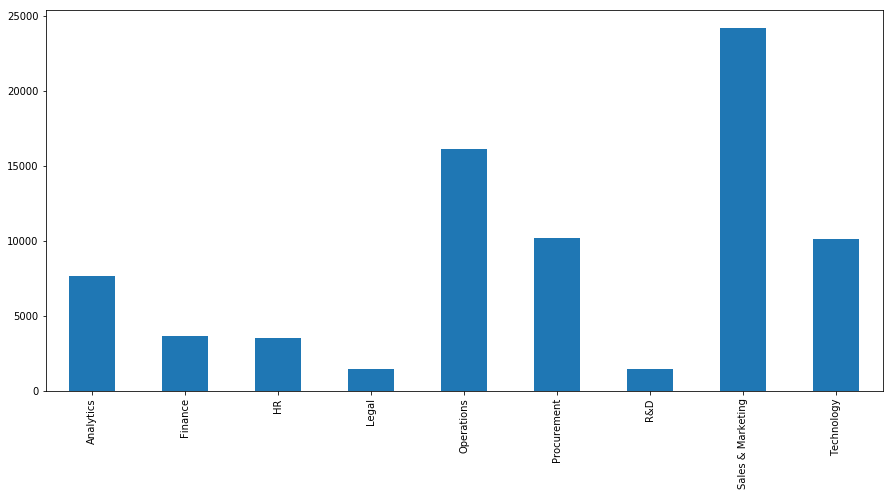

In [142]:
df['department'].value_counts().sort_index().plot.bar(figsize = (15,7))

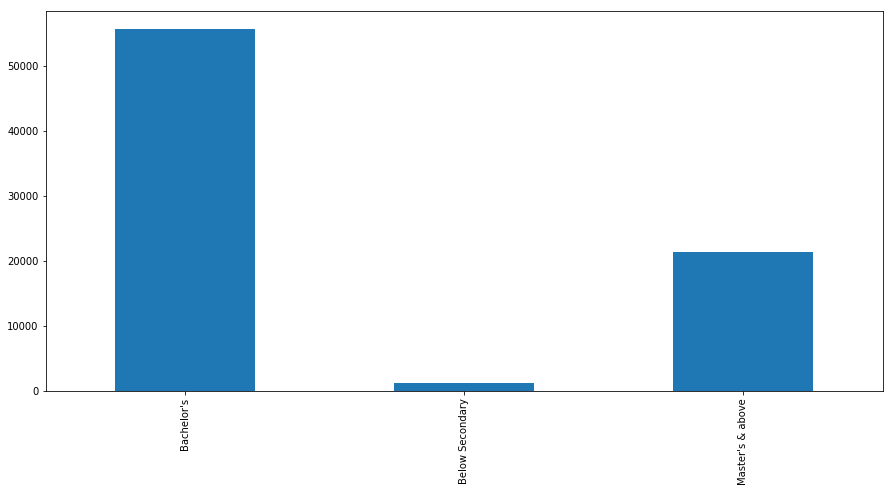

In [143]:
df['education'].value_counts().sort_index().plot.bar(figsize = (15,7))

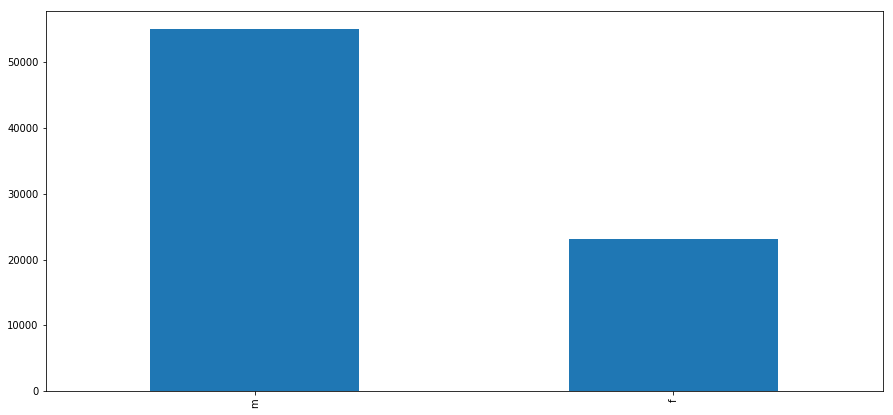

In [144]:
df['gender'].value_counts().plot.bar(figsize = (15,7))

In [145]:
service = df['length_of_service'].unique()
np.sort(service)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       37])

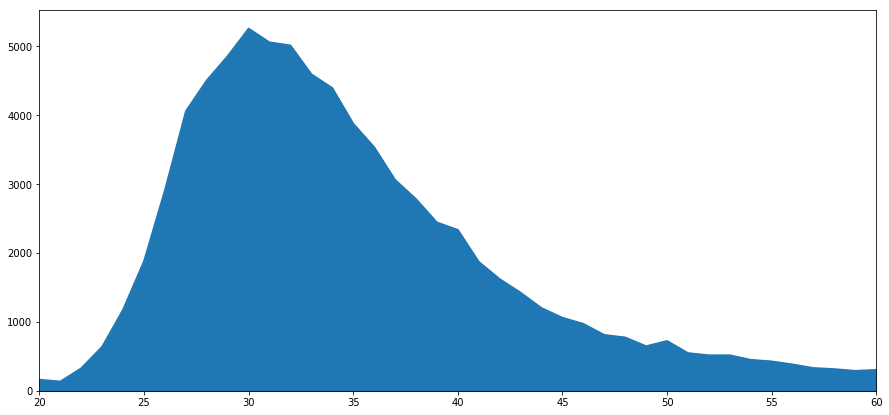

In [146]:
df['age'].value_counts().sort_index().plot.area(figsize = (15,7))

In [147]:
df['KPIs_met >80%'].value_counts()

0    50578
1    27720
Name: KPIs_met >80%, dtype: int64

In [148]:
df_train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [149]:
df_train[df_train['is_promoted']==1].groupby('department').agg({'is_promoted':'count'})

,is_promoted
department,
Analytics,512
Finance,206
HR,136
Legal,53
Operations,1023
Procurement,688
R&D,69
Sales & Marketing,1213
Technology,768


In [0]:
'''
replace() function in pandas will help us to rename the values in a particular column
'''
dict1 = {'m':'male','f':'female'}
df_train['gender'].replace(dict1, inplace = True) 

In [151]:
'''
cross tab will give the feel of data we have. the description of columns we include will be displayed here
'''
pd.crosstab(df_train["is_promoted"],df_train["gender"],margins=True)

gender,female,male,All
is_promoted,,,
0,14845,35295,50140
1,1467,3201,4668
All,16312,38496,54808


In [152]:
k = pd.crosstab(df_train['department'],df_train['is_promoted'], margins = True)
k

is_promoted,0,1,All
department,,,
Analytics,4840,512,5352
Finance,2330,206,2536
HR,2282,136,2418
Legal,986,53,1039
Operations,10325,1023,11348
Procurement,6450,688,7138
R&D,930,69,999
Sales & Marketing,15627,1213,16840
Technology,6370,768,7138


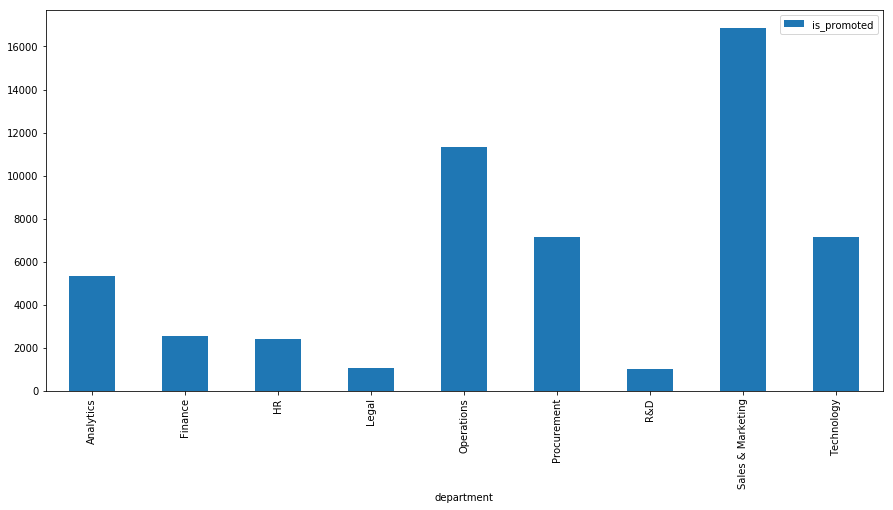

In [153]:
dept_prom = df_train.groupby('department').agg({'is_promoted':'count'})
dept_prom.plot(kind = 'bar', figsize = (15,7))

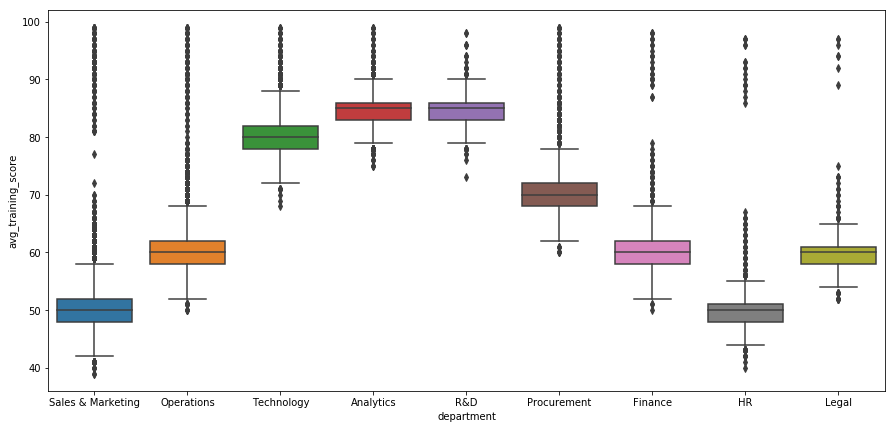

In [154]:
plt.figure(figsize = (15,7))
sns.boxplot(x = 'department', y = 'avg_training_score',data = df_train)

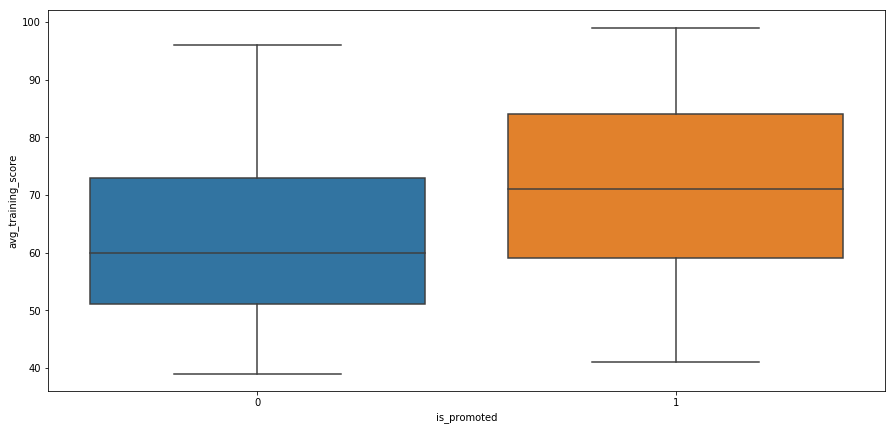

In [155]:
plt.figure(figsize = (15,7))
sns.boxplot('is_promoted','avg_training_score',data=df_train)

In [156]:
(k[1].values/k[0].values)

array([0.10578512, 0.08841202, 0.05959684, 0.05375254, 0.0990799 ,
       0.10666667, 0.07419355, 0.07762206, 0.12056515, 0.09309932])

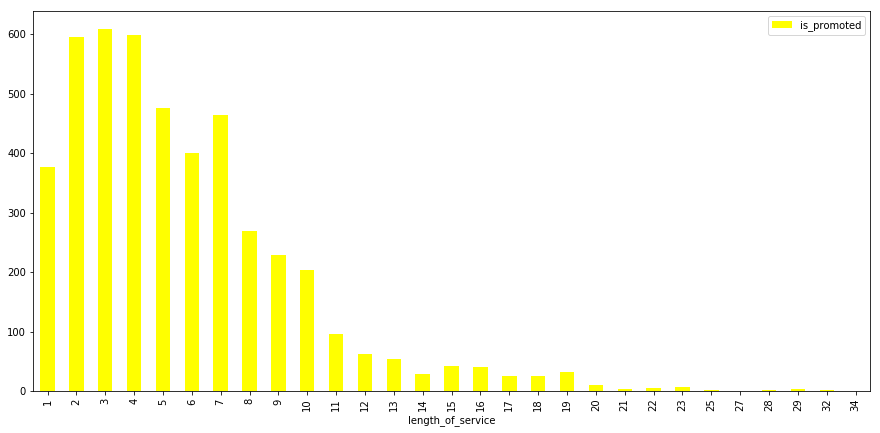

In [157]:
'''
Based on length of service, the number of employees promoted based on their eligibility 
Employees having work experience of 2-4 years have been promoted 
'''

service_promoted = df_train[df_train['is_promoted']==1].groupby('length_of_service').agg({'is_promoted':'count'})
service_promoted.plot(kind = 'bar', figsize = (15,7),color = 'yellow')

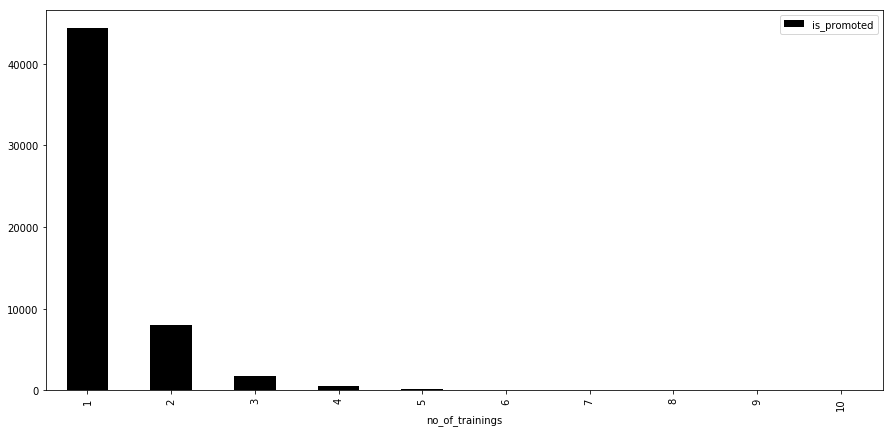

In [158]:
trainings = df_train.groupby('no_of_trainings').agg({"is_promoted":'count'})
trainings.plot(kind = 'bar',figsize = (15,7),color = 'black')

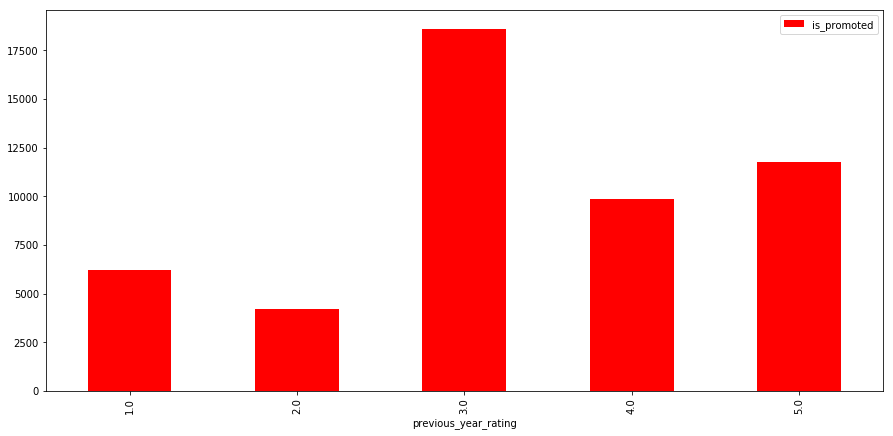

In [159]:
rating = df_train.groupby('previous_year_rating').agg({"is_promoted":'count'})
rating.plot(kind = 'bar',figsize = (15,7),color = 'red')

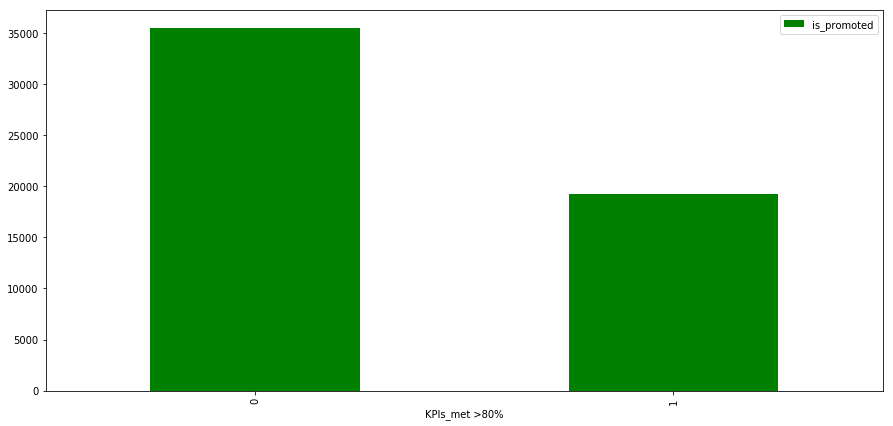

In [160]:
kpi = df_train.groupby('KPIs_met >80%').agg({"is_promoted":'count'})
kpi.plot(kind = 'bar',figsize = (15,7),color = 'green') 

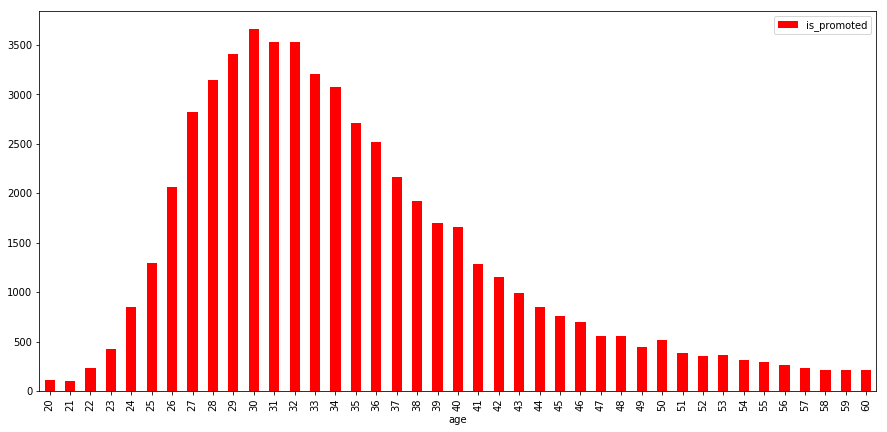

In [161]:
'''
Employees in the age group 26-37 years have been shortlisted for promotion
'''
age = df_train.groupby('age').agg({"is_promoted":'count'})
age.plot(kind = 'bar',figsize = (15,7),color = 'red') 

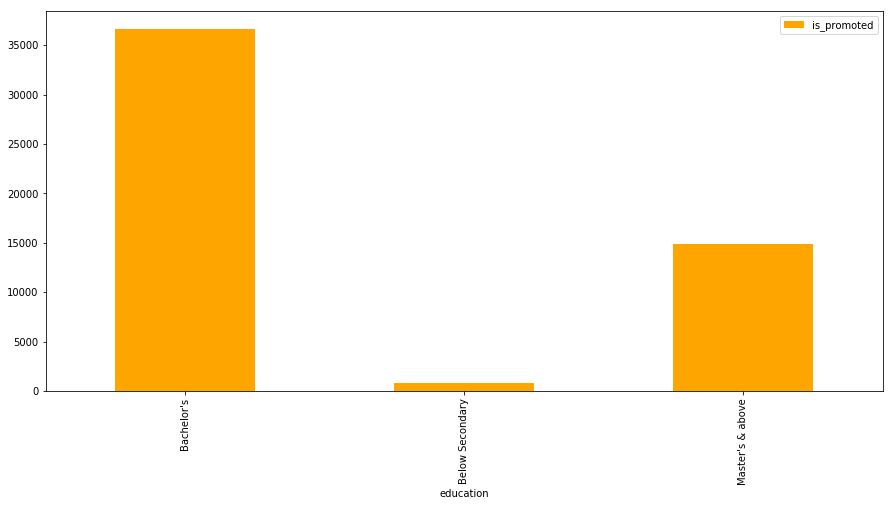

In [162]:
edu = df_train.groupby('education').agg({"is_promoted":'count'})
edu.plot(kind = 'bar',figsize = (15,7),color = 'orange') 

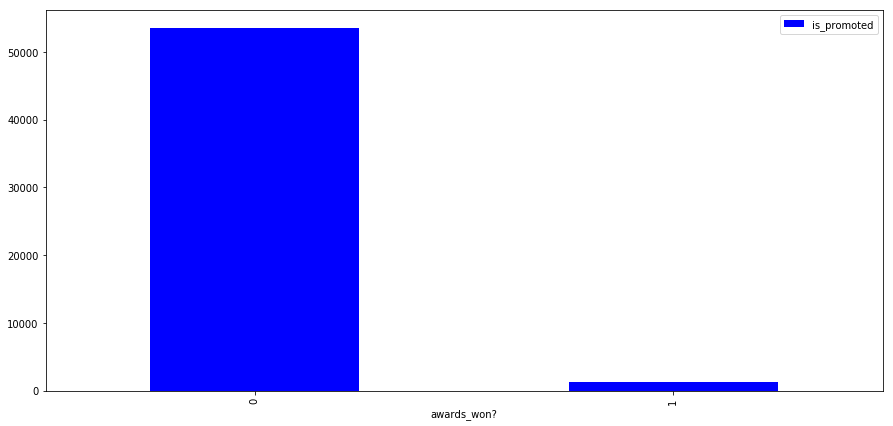

In [163]:
awards = df_train.groupby('awards_won?').agg({"is_promoted":'count'})
awards.plot(kind = 'bar',figsize = (15,7),color = 'blue') 

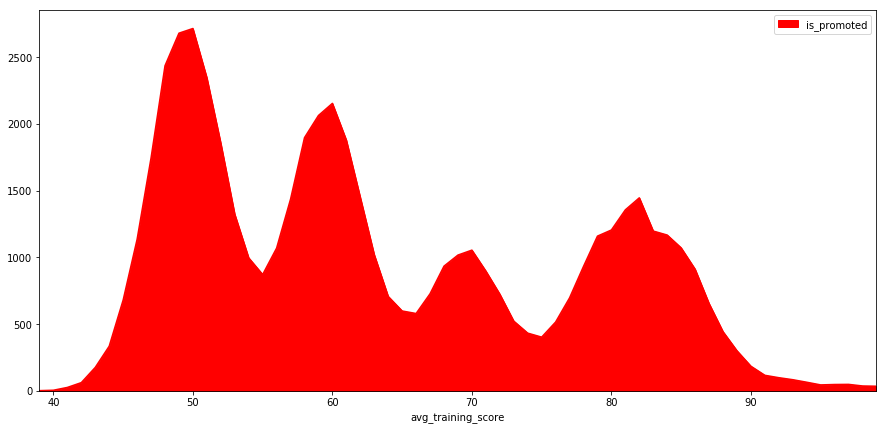

In [164]:
score = df_train.groupby('avg_training_score').agg({"is_promoted":'count'})
score.plot(kind = 'area',figsize = (15,7),color = 'red') 

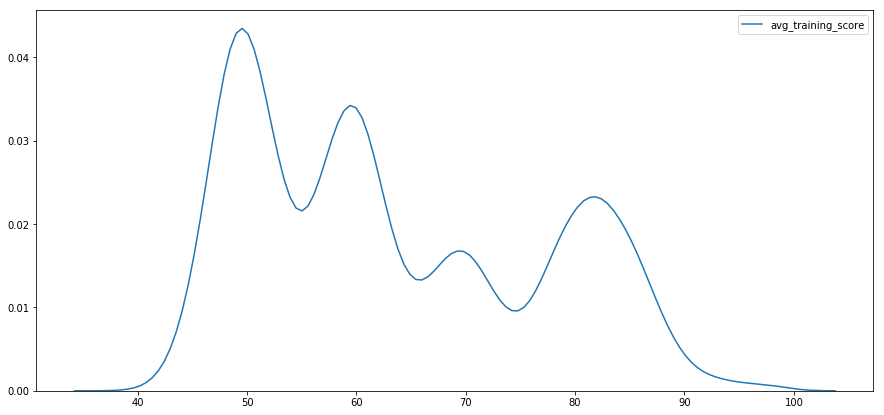

In [165]:
plt.figure(figsize = (15,7))
sns.kdeplot(df_train['avg_training_score'])

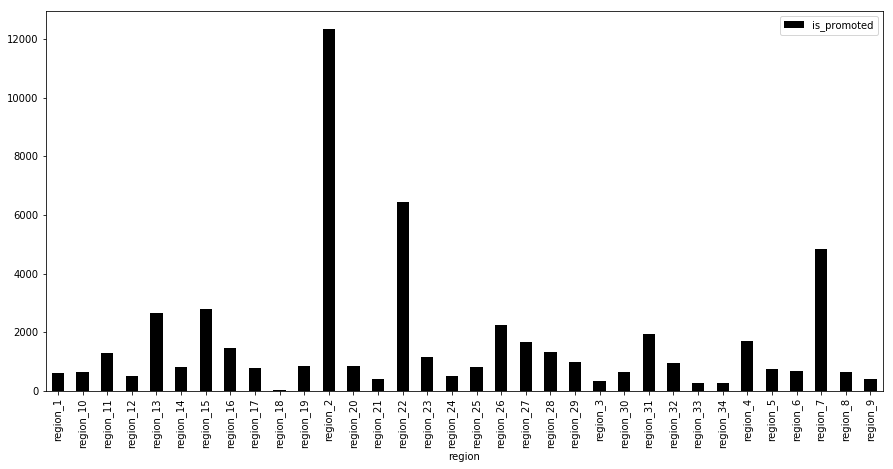

In [166]:
region = df_train.groupby('region').agg({"is_promoted":'count'})
region.plot(kind = 'bar',figsize = (15,7),color = 'black')

## Creating new variables

In [167]:
df['training_score'] = df['no_of_trainings']*df['avg_training_score']
df_train['training_score'] = df_train['no_of_trainings']*df_train['avg_training_score']
df.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,source,training_score
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,True,49
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,True,60
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,True,50
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,True,100
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,True,73
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0.0,True,170
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0.0,True,59
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0.0,True,63
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0.0,True,83
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0.0,True,54


In [0]:
df['start_job'] = df['age'] - df['length_of_service']
df_train['start_job'] = df_train['age'] - df_train['length_of_service']

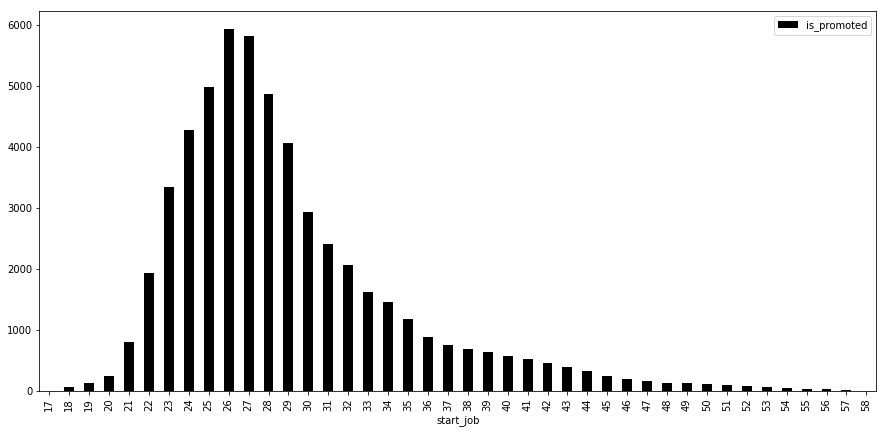

In [169]:
start_job = df_train.groupby('start_job').agg({"is_promoted":'count'})
start_job.plot(kind = 'bar',figsize = (15,7),color = 'black')

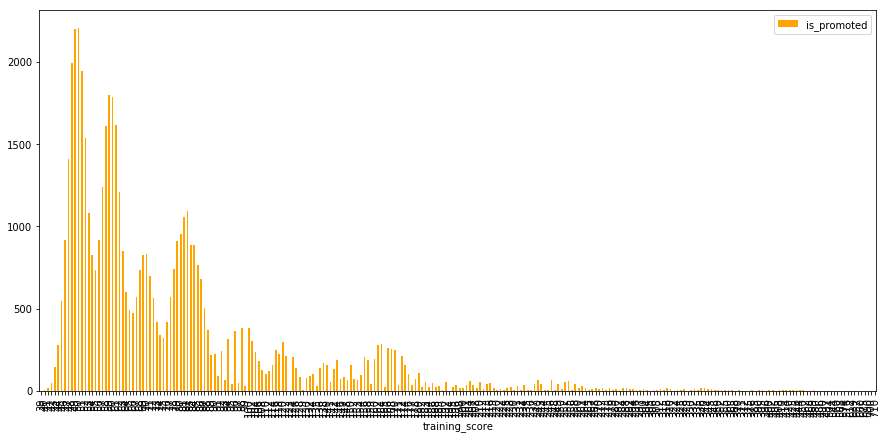

In [170]:
train_score = df_train.groupby('training_score').agg({"is_promoted":'count'})
train_score.plot(kind = 'bar',figsize = (15,7),color = 'orange')

In [0]:
df['sum_perform'] = df['awards_won?']+df['previous_year_rating']+df['KPIs_met >80%']
df_train['sum_perform'] = df_train['awards_won?']+df_train['previous_year_rating']+df_train['KPIs_met >80%']

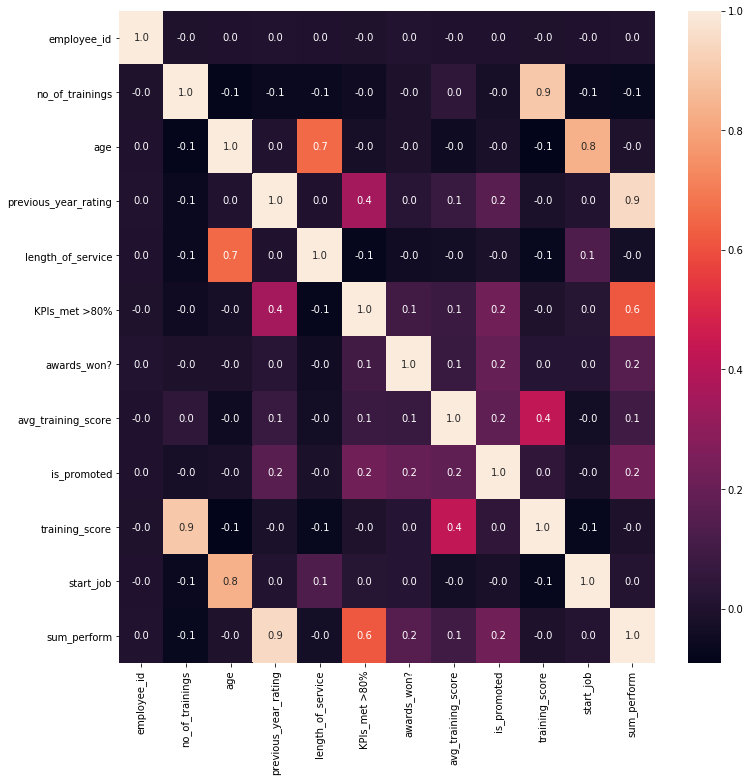

In [172]:
corr = df_train.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr, annot = True,fmt = '.1f',
        xticklabels=corr.columns,
        yticklabels=corr.columns, )

In [0]:
df.drop(['region','recruitment_channel'], axis = 1, inplace = True)

In [174]:
df.shape

(78298, 16)

In [175]:
df.columns

Index(['employee_id', 'department', 'education', 'gender', 'no_of_trainings',
       'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted', 'source',
       'training_score', 'start_job', 'sum_perform'],
      dtype='object')

In [176]:
df.dtypes

employee_id               int64
department               object
education                object
gender                   object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted             float64
source                   object
training_score            int64
start_job                 int64
sum_perform             float64
dtype: object

In [0]:
df.loc[df['education']=="Bachelor's",'education'] = 1
df.loc[df['education']=="Master's & above",'education'] = 2
df.loc[df['education']=="Below Secondary",'education'] = 0

In [0]:
def smoothing_target_encoder(df, column, target, weight=100):
    # Compute the global mean
    mean = df[target].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(column)[target].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the 'smoothed' means
    smooth = (counts * means + weight * mean) / (counts + weight)

    # Replace each value by the according smoothed mean
    return df[column].map(smooth)

In [0]:
df['department'] = smoothing_target_encoder(df, 'department','is_promoted')
df['gender'] = smoothing_target_encoder(df, 'gender','is_promoted')
df['education'] = smoothing_target_encoder(df, 'education','is_promoted')

In [180]:
df = pd.get_dummies(df, columns = ['department','gender','education'])
df.dtypes

employee_id                          int64
no_of_trainings                      int64
age                                  int64
previous_year_rating               float64
length_of_service                    int64
KPIs_met >80%                        int64
awards_won?                          int64
avg_training_score                   int64
is_promoted                        float64
source                              object
training_score                       int64
start_job                            int64
sum_perform                        float64
department_0.05400966182336704       uint8
department_0.057393568235430924      uint8
department_0.07053412631193363       uint8
department_0.07210844184278718       uint8
department_0.08137974386070375       uint8
department_0.0901045601691837        uint8
department_0.09547267146309887       uint8
department_0.09623058922586558       uint8
department_0.1072833662360894        uint8
gender_0.08315672621040561           uint8
gender_0.08

In [181]:
df.head(10)

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,source,training_score,start_job,sum_perform,department_0.05400966182336704,department_0.057393568235430924,department_0.07053412631193363,department_0.07210844184278718,department_0.08137974386070375,department_0.0901045601691837,department_0.09547267146309887,department_0.09623058922586558,department_0.1072833662360894,gender_0.08315672621040561,gender_0.08990476509973282,education_0.08010916853378976,education_0.0834442042174752,education_0.09847034973822395
0,65438,1,35,5.0,8,1,0,49,0.0,True,49,27,6.0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1,65141,1,30,5.0,4,0,0,60,0.0,True,60,26,5.0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,7513,1,34,3.0,7,0,0,50,0.0,True,50,27,3.0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
3,2542,2,39,1.0,10,0,0,50,0.0,True,100,29,1.0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,48945,1,45,3.0,2,0,0,73,0.0,True,73,43,3.0,0,0,0,0,0,0,0,0,1,1,0,1,0,0
5,58896,2,31,3.0,7,0,0,85,0.0,True,170,24,3.0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
6,20379,1,31,3.0,5,0,0,59,0.0,True,59,26,3.0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
7,16290,1,33,3.0,6,0,0,63,0.0,True,63,27,3.0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
8,73202,1,28,4.0,5,0,0,83,0.0,True,83,23,4.0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
9,28911,1,32,5.0,5,1,0,54,0.0,True,54,27,6.0,0,0,0,1,0,0,0,0,0,1,0,0,0,1


In [182]:
train = df.loc[df['source'] == "True"]
test = df.loc[df['source'] == "False"]

train.drop(['source'], axis = 1, inplace = True)
test.drop(['is_promoted','source'], axis = 1, inplace = True)

print(train.shape)
print(test.shape)

train.to_csv("train_mod", index = False)
test.to_csv("test_mod", index = False)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(54808, 26)
(23490, 25)


In [183]:
train.columns

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'training_score', 'start_job',
       'sum_perform', 'department_0.05400966182336704',
       'department_0.057393568235430924', 'department_0.07053412631193363',
       'department_0.07210844184278718', 'department_0.08137974386070375',
       'department_0.0901045601691837', 'department_0.09547267146309887',
       'department_0.09623058922586558', 'department_0.1072833662360894',
       'gender_0.08315672621040561', 'gender_0.08990476509973282',
       'education_0.08010916853378976', 'education_0.0834442042174752',
       'education_0.09847034973822395'],
      dtype='object')

In [0]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
principal_comp = pca.fit_transform(train) 
prin_comp_df = pd.DataFrame(data = principal_comp, columns = ['Comp1','Comp2'])

total_df = pd.concat([prin_comp_df, train.is_promoted],axis = 1)

In [0]:
#Define target and ID columns:
target = 'is_promoted'
IDcol = ['employee_id']

from sklearn.model_selection import cross_val_score
from sklearn import metrics

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=10, scoring='f1')
    
    #Print model report:
    print("\nModel Report")
    print("F1_score", metrics.f1_score(dtrain[target].values, dtrain_predictions))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

In [0]:
from sklearn.ensemble import RandomForestClassifier
predictors = [x for x in train.columns if x not in [target]+IDcol]
len(predictors)

In [0]:
'''
alg2 = RandomForestClassifier(n_estimators = 400, max_features = 7, n_jobs = 5, min_samples_leaf = 50)
modelfit(alg2, train, test, predictors, target, IDcol, 'alg2.csv')
coef2 = pd.Series(alg2.feature_importances_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')
'''

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
predictors = [x for x in train.columns if x not in [target]+IDcol]

alg3 = GradientBoostingClassifier(n_estimators = 300,  min_samples_leaf = 50, subsample = 0.65, learning_rate = 0.2, loss = 'deviance')
modelfit(alg3, train, test, predictors, target, IDcol, 'alg3.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values()
coef3.plot(kind='bar', title='Model Coefficients')